### Introducción a la probabilidad bayesiana y al modelado bayesiano

Credits: Bayesian analysis with python - Third edition

Los **modelos** son descripciones simplificadas (o abstracciones) de un sistema o proceso determinado que, por alguna razón, nos interesa. Esas descripciones están diseñadas deliberadamente para capturar sólo los aspectos más relevantes del sistema y no explicar cada detalle menor. Es por este detalle que no siempre un modelo más complejo es un modelo mejor.

En particular, los modelos bayesianos son modelos probabilisticos que se basan en la actualización de creencias sobre un parámetro desconocido a medida que recopilamos más información. A diferencia de la estadística frecuentista donde solo se admiten probabilidades basadas en experimientos empíricos, la estadística bayesiana hace uso de un conocimiento subjetivo que se irá modificando a medida que tenemos más información.

Recordando el teorema de bayes:

$$
{\displaystyle P(A_{i}|B)={\frac {P(B|A_{i})P(A_{i})}{P(B)}}}
$$

Tenemos que P(A) es justamente esa información subjetiva que tenemos sobre la data o, más bien, lo que sabemos del parámetro (A) antes de observar la data (B). La llamamos *prior*. Por otro lado, P(B) representa una probabilidad marginal de nuestra likelihood (de nuestra data), como vamos a ver después no es otra cosa que pensarlo como la probabilidad de observar la data habiendo evaluado todas las posibilidades de parámetros. Por otro lado, tenemos la P(B/A) esto se denomina likelihood y representa la probabilidad de observar ciertos datos en la naturaleza dado una hipótesis de parámetro. Por último tenemos la posterior P(A/B) que es la probabilidad de obtener un parámetro dada la data que observamos.

Algo a considerar es que nuestra posterior P(A/B) es una una función de distribución sobre el parámetro, no un solo valor.

Cuando trabajamos con estos modelos siempre tenemos que pensar en que tenemos un espacio muestral (S) y un conjunto de eventos (A) que son subespacios del espacios muestral (S). Dentro del espacio muestral no todos los elementos tienen la misma probabilidad en la naturaleza. No obstante, considerar todos los eventos igualmente probables es sólo un caso particular que hace que el cálculo probabilidades sea más fácil. Este caso se suele llamar "*naive*" dado que recae sobre supuestos muy fuertes pero es muy útil para la simplificación.

In [2]:
# Importamos algunas librerías
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom, beta
import preliz as pz

In [2]:
# Sub espacio muestral con todas las combinaciones de respuestas de preguntas a 3 personas
S = {('yes', 'yes', 'yes'), ('yes', 'yes', 'no'), ('yes', 'no', 'yes'),
     ('no', 'yes', 'yes'), ('yes', 'no', 'no'), ('no', 'yes', 'no'),
     ('no', 'no', 'yes'), ('no', 'no', 'no')}

In [3]:
# Escenario a evaluar
A = {('yes', 'yes', 'yes')}

In [4]:
# Definición de la probabilidad
def P(S, A):
    if set(A).issubset(set(S)):
        return len(A)/len(S)
    else:
        return 0

In [5]:
# Probabilidad de que las 3 personas hayan respondido yes
P(S,A)

0.125

Cuando previamente mencionamos el teorema de bayes nos falto definir lo que representan los términos que tienen un "/". Estos términos no son más que **probabilidades condicionales**. Por ejemplo, en el caso de P(A/B) es la probabilidad de que ocurra A condicionada a que ya ocurrió B. Por otro lado, el numerador es la **probabilidad conjunta** de que tanto A como B ocurran.

$$
{\displaystyle P(A\mid B)={\frac {P(A\cap B)}{P(B)}}}
$$

Cuando condicionamos nuestra información lo que estamos haciendo es cambiando el espacio muestral. Por ejemplo: La probabilidad de obtener un 3 en una tirada de dado es 1/6 pero si sabemos que vamos a sacar un número impar tenemos que P(X = 3 / {1,3,5}) = 1/3. En estos casos, solemos llamar a P(A) y P(B) **probabilidades marginales**. Generalmente, con le enfoque frecuentista suele ser fácil obtener estas proabilidades. No obstante, cuando estamos trabajando con probabilidades conjuntas obtener probabilidades marginales es un poco distinto. Para esto tenemos que sumarizar todas las probabilidades conjuntas sobre la variable B. Suponiendo que B solo toma valores de b1 y b2, de forma discreta tenemos:

$$
{\displaystyle P(A=a1​)=P(A=a1​,B=b1​)+P(A=a1​,B=b2​)=0.2+0.3=0.5}
$$

Si la distribución fuese continua:

$$
P(X=x)=∫f(x,y)dy
$$

Text(1, -2, ' ... $p(A \\mid B)$')

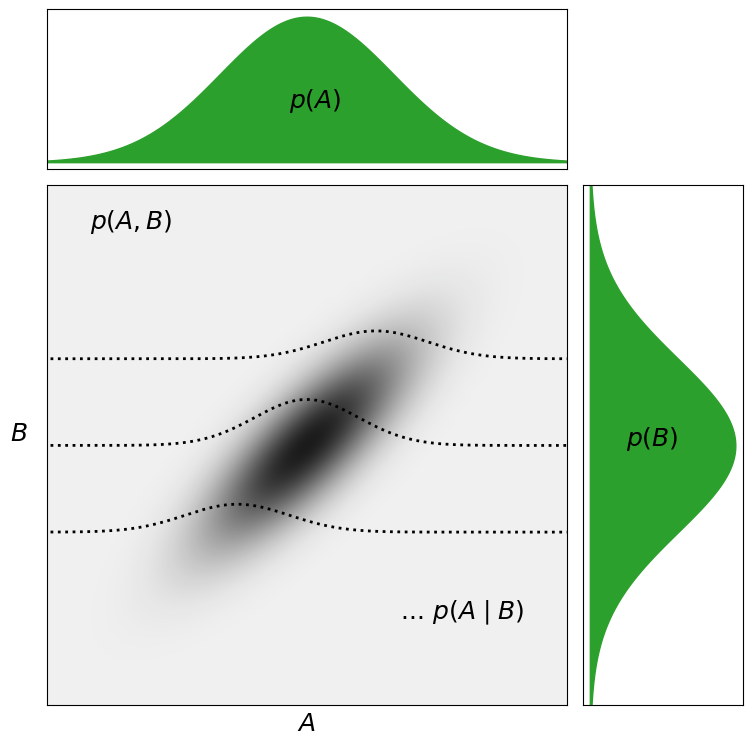

In [6]:
# Creamos un gráfico que explica como interactuan las distintas probabilidades
x, y = np.mgrid[-4:4:.01, -4:4:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = pz.MvNormal([0, 0], [[1, 0.8], 
                          [0.8, 1]])

x_value = pos[:, :, 0][:,0]
x_density = rv.pdf(pos)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]


_, axes_arr = plt.subplots(1, 3, figsize=(8, 8))

ax_joint, ax_x, ax_y = axes_arr
ax_joint.set_position(rect_scatter)
ax_x.set_position(rect_histx)
ax_y.set_position(rect_histy)

ax_joint.imshow(x_density, cmap='cet_gray_r', origin='lower', extent=[-3, 3, -3, 3])

ax_joint.plot(x_value, x_density[400]*2, 'k:', lw=2)
ax_joint.plot(x_value, x_density[500]*2+1, 'k:', lw=2)
ax_joint.plot(x_value, x_density[300]*2-1, 'k:', lw=2)

ax_x.fill_between(x_value, x_density.sum(1), color='C2')
ax_y.fill_betweenx(x_value, x_density.sum(1), color='C2')


for ax in [ax_joint, ax_x, ax_y]:
    ax.grid(False)
    ax.set_facecolor('w')
    ax.set_xticks([])
    ax.set_yticks([])
ax_joint.set_xlim(-3, 3)
ax_joint.set_ylim(-3, 3)
ax_x.set_xlim(-3, 3)
ax_y.set_ylim(-3, 3)
ax_x.set_xlim(-3, 3)
ax_joint.set_ylabel('$B$', rotation=0, labelpad=20, fontsize=18)
ax_joint.set_xlabel('$A$', fontsize=18)

ax_joint.text(-2.5, 2.5, '$p(A, B)$', fontsize=18, color='k', weight='medium')
ax_y.text(10, 0, '$p(B)$', fontsize=18, color='k', weight='medium')
ax_x.text(-0.2, 15, '$p(A)$', fontsize=18, color='k', weight='medium')
ax_joint.text(1, -2, ' ... $p(A \mid B)$', fontsize=18, color='k', weight='medium')

#### Interpretaciones de la probabilidad

Como mencionamos antes, generalmente conocemos una sola mirada sobre lo que es la probabilidad y es el enfoque frecuentista. Es decir, una mirada empírica y experimental de lo que es la probabilidad mediante el uso de experimientos. No obstante, existe una segnuda mirada: Bayesiana. Este enfoque se puede interpretar como una medida de la incertidubre de un individuo ante la ocurrencia de un evento. Es decir, representa un estado de conocimiento del mundo y no necesariamente en la repetición de experimientos. Este enfoque nos permite generalizar probabilidades sobre experimientos que resultaría complejo realizar. 

#### Problema de la moneda

**theta**      = Representa el sesgo de que salga cara sobre seca.

**Y**          = Probabilidad marginal de sacar cara sobre seca (# cara / # tiradas)

**P(theta)**   = prior

**P(Y/theta)** = Likelihood

Vamos a asumir que la variable aleatoria "tirada de la moneda" es una variable aleatoria independiente e identicamente distribuida. Esto quiere decir que una tirada no afecta a la otra y que todas las tiradas surgen de la misma distribución. Por este motivo, podemos asumir que una buena distribución para nuestra **likelihood** es la binomial.

$$
{\displaystyle \operatorname {P} [Y/theta]={\frac {n!}{y!(n-y)!}}(theta)^{y}(1-(theta))^{n-y}}
$$

Para la prior vamos a utilizar la disribución beta. Es una distribución muy utilizada ya que es la distribución conjugada de la binomial, esto implicaría que la distribución a posteriori será una distribución beta. Esto es muy útil dado que si lo que estamos buscando es una probabilidad necesitamos una distribución cuyo dominio este entre 0 y 1 (como la beta).

$$
P(theta) = \frac{1}{B(a, b)} theta^{a-1} (1 - theta)^{b-1}, \quad x \in (0, 1)
$$
$$
B(a, b) = \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)}
$$

Por otro lado, para la posterior vamos a tener una función de distribución beta dado que son distribuciones conjugadas pero si descartamos los primeros terminos que nos dependen de beta vemos que tenemos una distribución beta con parámetros **Beta(alpha + y; beta + N - y)**

$$
{P} [theta/Y] ={\frac {n!}{y!(n-y)!}}(theta)^{y}(1-(theta))^{n-y} * \frac{\Gamma(a) \Gamma(b)}{\Gamma(a + b)} theta^{a-1} (1 - theta)^{b-1}
$$

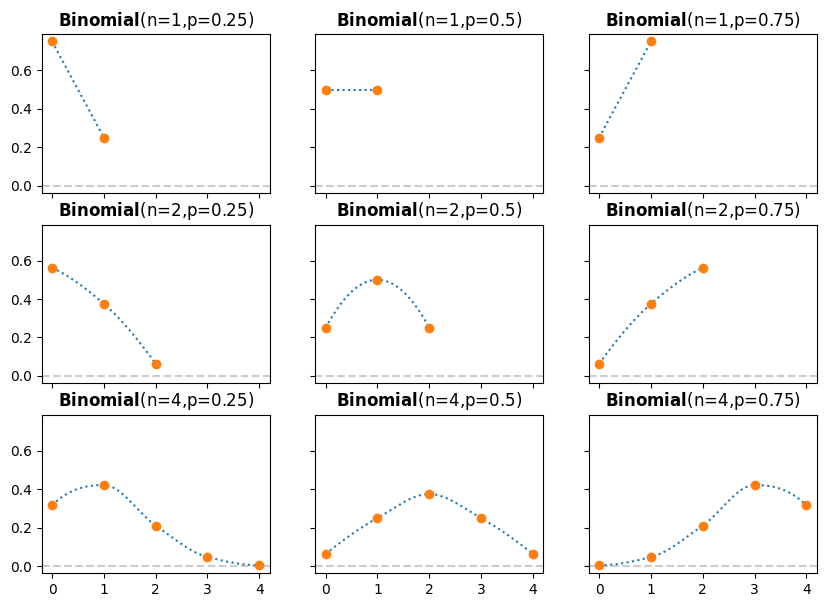

In [5]:
# Comportamiento de la Likelihood
n_params = [1, 2, 4] # Número total de tiradas
p_params = [0.25, 0.5, 0.75] # Probabilidad de éxito o sesgo

_, axes = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey=True)
for i, n in enumerate(n_params):
    for j, p in enumerate(p_params):
        pz.Binomial(n, p).plot_pdf(legend="title", ax=axes[i, j])


(-0.2, 5.0)

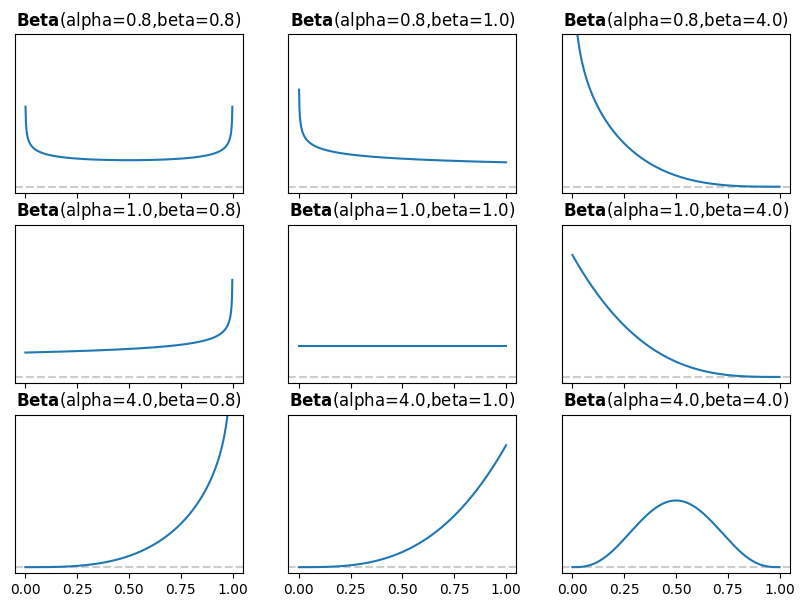

In [6]:
# Comportamiento de la prior
params = [0.8, 1, 4]

_, axes = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey=True)
for i, alpha in enumerate(params):
    for j, beta in enumerate(params):
        pz.Beta(alpha, beta).plot_pdf(legend="title", ax=axes[i, j])
axes[0][0].set_ylim(-0.2, 5)

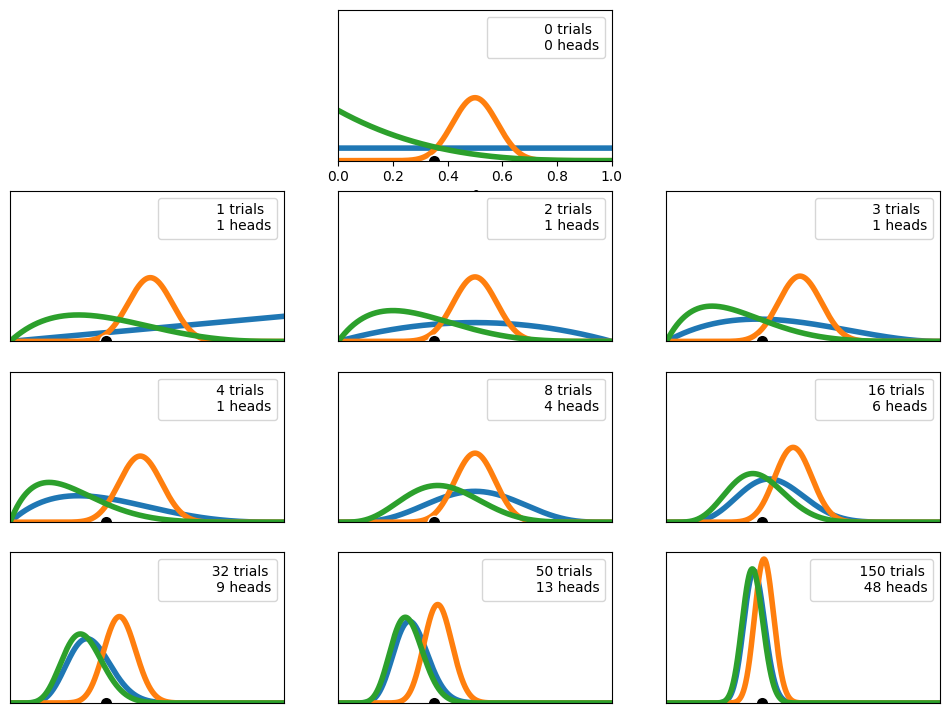

In [7]:
# Comportamiento de la posterior
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

# La primera es una distribución uniforme (azul), distribución normal (narnja), distribución exponencial (asimétrica)
beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]
    for (α_prior, β_prior) in beta_params:
        posterior = pz.Beta(α_prior + y, β_prior + N - y).pdf(x)
        plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

#### Conclusiones del análisis bayesiano

* El resultado es una distribución de probabilidad no un solo valor.
* El valor más probable de la distribución viene dado por la moda de la distribución.
* Intuitivamente, a medida que observamos más data más confianza tenemos en el resultado.
* Dada una cantidad de datos suficientemente grande, dos o más modelos bayesianos con diferentes *priors* tenderán a converger hacia el mismo resultado. En el límite de datos infinitos no importa qué prior utilicemos, todos proporcionarán la misma *porterior*.
* La velocidad de convergencia de la distribución a posteriori depende de la data y del modelo (la prior elegida).
* Algo que no es obvio en la figura es que obtendremos el mismo resultado si actualizamos la *posterior* secuencialmente como si lo hiciéramos todo a la vez. Podemos calcular la *posterior* 150 veces, añadiendo cada vez una observación más y utilizando la obtenida *posterior* como la nueva *prior*, o simplemente podemos calcular un posterior para los 150 lanzamientos. El resultado será exactamente el mismo.